In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [131]:
import os

In [132]:
[file for file in os.listdir('C:/Users/lelo/Documents/Python Scripts/python project/malaria/')]

['archive (3).zip',
 'children-sleeping-under-treated-bednet.csv',
 'global-malaria-deaths-by-world-region.csv',
 'incidence-of-malaria.csv',
 'malaria-death-rates-by-age.csv',
 'malaria-death-rates.csv',
 'malaria-deaths-by-age.csv',
 'malaria-deaths-by-region.csv',
 'malaria-deaths-comparisons.csv',
 'malaria-prevalence-vs-gdp-per-capita.csv']

# children sleeping under treated bednets

In [133]:
df_children=pd.read_csv('children-sleeping-under-treated-bednet.csv')
df_children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 4 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         278 non-null    object 
 1   Code                                                           273 non-null    object 
 2   Year                                                           278 non-null    int64  
 3   Use of insecticide-treated bed nets (% of under-5 population)  278 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.8+ KB


In [134]:
df_children.head()

,Entity,Code,Year,Use of insecticide-treated bed nets (% of under-5 population)
0,Afghanistan,AFG,2015,4.600000
1,Angola,AGO,2001,2.300000
2,Angola,AGO,2007,17.700001
3,Angola,AGO,2011,25.900000
4,Angola,AGO,2016,21.700001


In [135]:
df_children['Use of insecticide-treated bed nets (% of under-5 population)']=df_children['Use of insecticide-treated bed nets (% of under-5 population)'].astype(int)
df_children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 4 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Entity                                                         278 non-null    object
 1   Code                                                           273 non-null    object
 2   Year                                                           278 non-null    int64 
 3   Use of insecticide-treated bed nets (% of under-5 population)  278 non-null    int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 7.7+ KB


top 10 countries which children sleep in treated bed nets

In [136]:
df_children.groupby('Entity')['Use of insecticide-treated bed nets (% of under-5 population)'].sum().sort_values(ascending=False).head(10)

Entity
Senegal       478
Rwanda        420
Uganda        339
Malawi        327
Madagascar    318
Gambia        306
Ghana         302
Mali          299
Zambia        298
Tanzania      296
Name: Use of insecticide-treated bed nets (% of under-5 population), dtype: int32

visualizing Senegal as top country with percentage of children sleep in treated bed nets

In [137]:
df_sen=df_children[df_children['Entity']=='Senegal']

<AxesSubplot:xlabel='Year'>

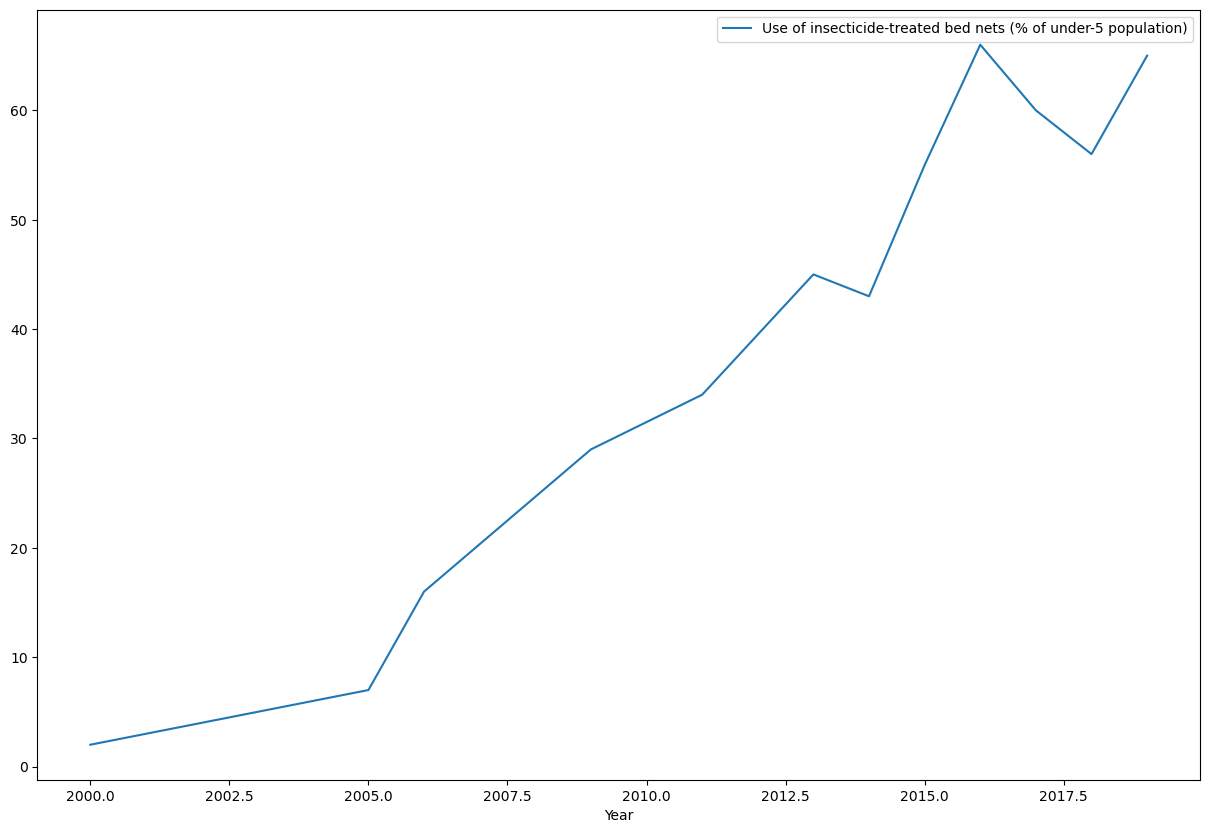

In [138]:
df_sen.set_index('Year').plot(figsize=(15,10))

visualizing Tanzania

In [139]:
df_tz=df_children[df_children['Entity']=='Tanzania']

<AxesSubplot:xlabel='Year'>

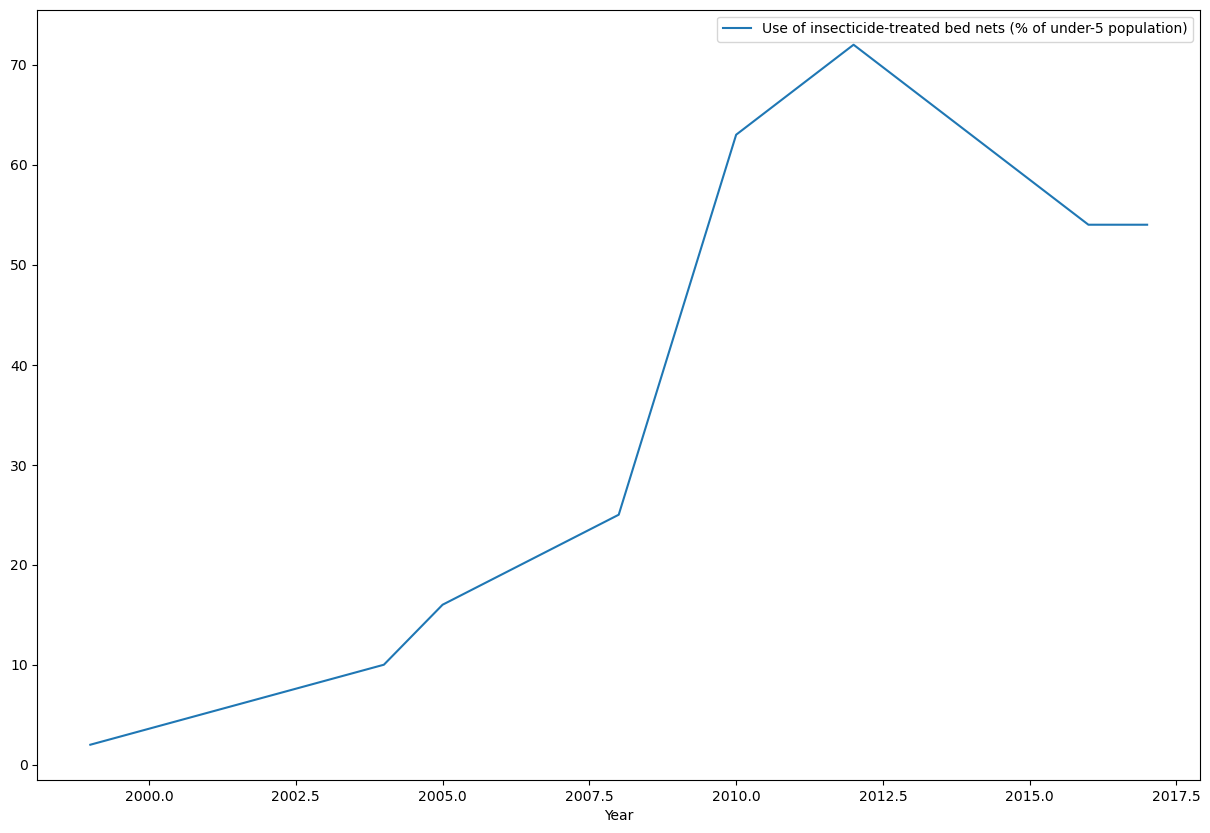

In [140]:
df_tz.set_index('Year').plot(figsize=(15,10))

# malaria death by world region

In [141]:
df_global=pd.read_csv('global-malaria-deaths-by-world-region.csv')
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          126 non-null    object 
 1   Code            0 non-null      float64
 2   Year            126 non-null    int64  
 3   malaria_deaths  126 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.1+ KB


In [142]:
df_global.drop(columns='Code')

,Entity,Year,malaria_deaths
0,Africa,2000,840000
1,Africa,2001,838000
2,Africa,2002,797000
3,Africa,2003,774000
4,Africa,2004,750000
...,...,...,...
121,Western Pacific,2016,2900
122,Western Pacific,2017,3000
123,Western Pacific,2018,3000
124,Western Pacific,2019,2600


In [143]:
df1=df_global.groupby(['Entity','Year']).mean()['malaria_deaths']

In [144]:
df1.sort_values(ascending=False).head()

Entity  Year
Africa  2000    840000.0
        2001    838000.0
        2002    797000.0
        2003    774000.0
        2004    750000.0
Name: malaria_deaths, dtype: float64

C:\Users\lelo\AppData\Local\Temp\ipykernel_1824\3257056100.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



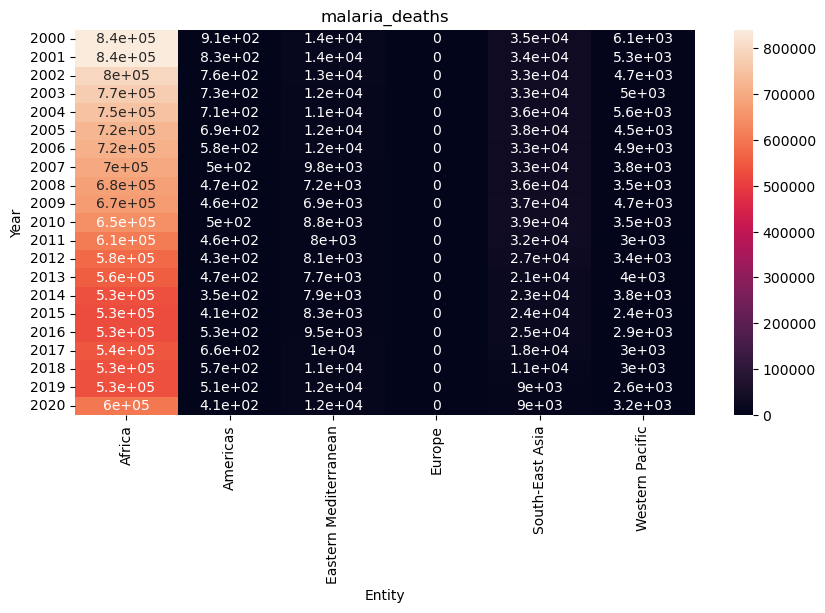

In [145]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(df1.unstack(level=0),annot=True).set_title("malaria_deaths");
fig.show()

africa is leading region with more malaria death number but the number has gradually decrease,then followed by south-east asia,Eastern Mediterranean,Western Pacific,Americas,europe

# malaria death by age

In [146]:
df_age=pd.read_csv('malaria-deaths-by-age.csv')
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Entity                                                    6840 non-null   object
 1   Code                                                      6150 non-null   object
 2   Year                                                      6840 non-null   int64 
 3   Deaths - Malaria - Sex: Both - Age: Under 5 (Number)      6840 non-null   int64 
 4   Deaths - Malaria - Sex: Both - Age: 70+ years (Number)    6840 non-null   int64 
 5   Deaths - Malaria - Sex: Both - Age: 5-14 years (Number)   6840 non-null   int64 
 6   Deaths - Malaria - Sex: Both - Age: 15-49 years (Number)  6840 non-null   int64 
 7   Deaths - Malaria - Sex: Both - Age: 50-69 years (Number)  6840 non-null   int64 
dtypes: int64(6), object(2)
memory

In [147]:
df_age.head()

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: 70+ years (Number),Deaths - Malaria - Sex: Both - Age: 5-14 years (Number),Deaths - Malaria - Sex: Both - Age: 15-49 years (Number),Deaths - Malaria - Sex: Both - Age: 50-69 years (Number)
0,Afghanistan,AFG,1990,21,5,3,46,19
1,Afghanistan,AFG,1991,41,11,6,94,38
2,Afghanistan,AFG,1992,51,12,8,125,44
3,Afghanistan,AFG,1993,24,5,3,58,17
4,Afghanistan,AFG,1994,52,9,7,110,33


In [148]:
df_age.describe()

,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: 70+ years (Number),Deaths - Malaria - Sex: Both - Age: 5-14 years (Number),Deaths - Malaria - Sex: Both - Age: 15-49 years (Number),Deaths - Malaria - Sex: Both - Age: 50-69 years (Number)
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,12045.208918,814.667544,1456.319152,2495.256579,2091.688012
std,8.656074,64858.902555,4317.519945,7222.582793,12223.046659,10818.370654
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,217.250000,44.250000,57.000000,299.000000,169.000000
max,2019.000000,631523.000000,44746.000000,91874.000000,131508.000000,111035.000000


on table above overrall statistics in most countries malaria mostly affect (brings death) to children under 5 age , followed by age between(15-49), then age between(50-69), age(5-14) and least death age(70+)

top 10 countries with death occurance at age under 5 years 

<AxesSubplot:xlabel='Entity'>

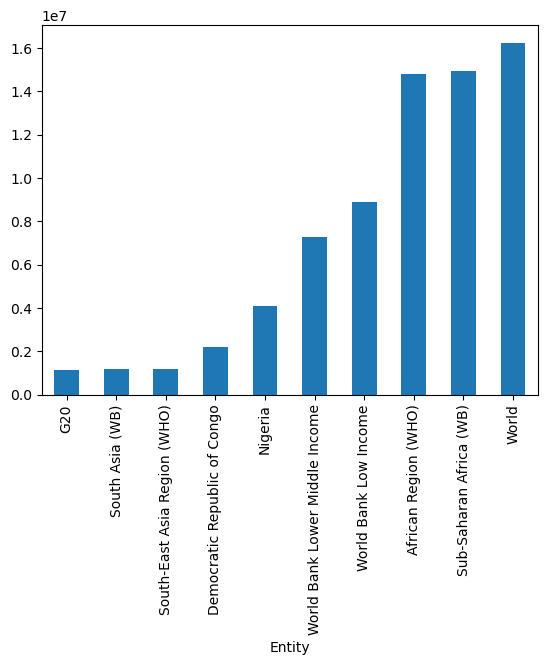

In [149]:
df_age.groupby('Entity')['Deaths - Malaria - Sex: Both - Age: Under 5 (Number)'].sum().sort_values(ascending=True).tail(10).plot.bar()

# incidence of malaria per population

In [150]:
df_inc=pd.read_csv('incidence-of-malaria.csv')
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               2442 non-null   object 
 1   Code                                                 2232 non-null   object 
 2   Year                                                 2442 non-null   int64  
 3   Incidence of malaria (per 1,000 population at risk)  2442 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 76.4+ KB


In [151]:
df_inc.head()

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,81.969559
1,Afghanistan,AFG,2001,78.832069
2,Afghanistan,AFG,2002,79.385788
3,Afghanistan,AFG,2003,68.091560
4,Afghanistan,AFG,2004,37.616467


In [152]:
df_inc.dropna(inplace=True)
df_inc.isna().sum()

Entity                                                 0
Code                                                   0
Year                                                   0
Incidence of malaria (per 1,000 population at risk)    0
dtype: int64

In [153]:
df_inc['Incidence of malaria (per 1,000 population at risk)']=df_inc['Incidence of malaria (per 1,000 population at risk)'].astype(int)
df_inc.head()

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,81
1,Afghanistan,AFG,2001,78
2,Afghanistan,AFG,2002,79
3,Afghanistan,AFG,2003,68
4,Afghanistan,AFG,2004,37


 top 5 countries with more and less  incidence of malaria per population

In [154]:
df_inc.groupby('Entity')['Incidence of malaria (per 1,000 population at risk)'].sum().sort_values(ascending=False).head(5)

Entity
Burkina Faso     10544
Benin             8919
Sierra Leone      8662
Cote d'Ivoire     8469
Mali              8410
Name: Incidence of malaria (per 1,000 population at risk), dtype: int32

In [155]:
df_inc.groupby('Entity')['Incidence of malaria (per 1,000 population at risk)'].sum().sort_values(ascending=True).head(5)

Entity
Dominican Republic      0
El Salvador             0
Turkmenistan            0
United Arab Emirates    0
Syria                   0
Name: Incidence of malaria (per 1,000 population at risk), dtype: int32

In [166]:
df2=df_inc.groupby('Code')['Incidence of malaria (per 1,000 population at risk)'].sum().sort_values(ascending=False).head(5)
df3=df_inc.groupby('Code')['Incidence of malaria (per 1,000 population at risk)'].sum().sort_values(ascending=True).head(5)                                                                                                                    

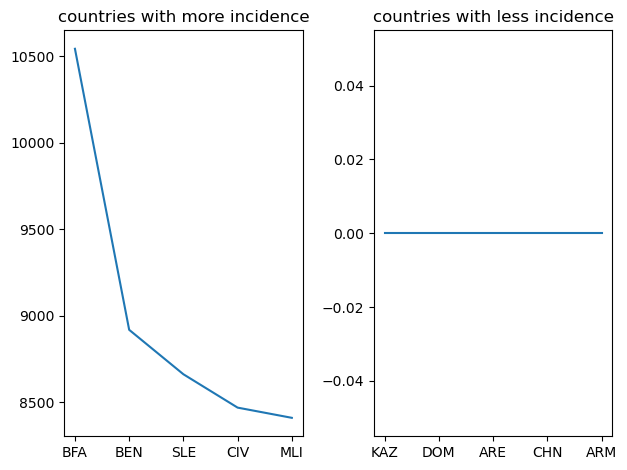

In [167]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(df2)
axes[0].set_title('countries with more incidence')
axes[1].plot(df3)
axes[1].set_title('countries with less incidence')

fig.subplots_adjust(wspace=0.8)
fig.tight_layout() 

plt.show()

# malaria death by  country 

In [158]:
df_region=pd.read_csv('malaria-deaths-by-region.csv')
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Entity                                                 6840 non-null   object
 1   Code                                                   6150 non-null   object
 2   Year                                                   6840 non-null   int64 
 3   Deaths - Malaria - Sex: Both - Age: All Ages (Number)  6840 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 213.9+ KB


In [159]:
df_region.head()

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,93
1,Afghanistan,AFG,1991,189
2,Afghanistan,AFG,1992,239
3,Afghanistan,AFG,1993,108
4,Afghanistan,AFG,1994,211


top 20 countries leading on death

<AxesSubplot:ylabel='Entity'>

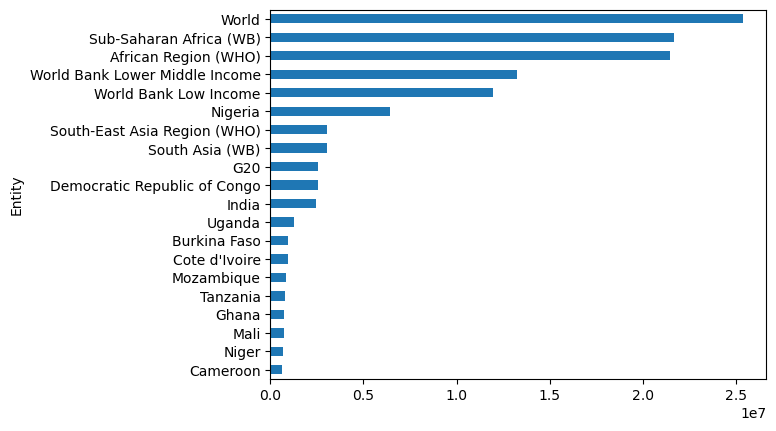

In [160]:
df_region.groupby('Entity')['Deaths - Malaria - Sex: Both - Age: All Ages (Number)'].sum().sort_values(ascending=True).tail(20).plot.barh(x='number of deaths')

pivoting the data to find the number of death increase and decrease by years

In [161]:
pivot_table=df_region.pivot_table(index='Entity',columns='Year',values='Deaths - Malaria - Sex: Both - Age: All Ages (Number)')

In [162]:
pivot_table.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,93,189,239,108,211,175,175,240,563,468,...,377,390,94,143,228,284,388,399,466,530
African Region (WHO),588508,607330,620445,638935,650973,668983,688268,708186,726403,743180,...,804031,764244,727320,694438,655614,631381,604566,578326,578552,590252
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,9,9,12,12,8,7,5,5,2,1,...,0,0,0,0,0,0,0,0,0,0
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


top 10 countries which have increased in malaria death from 1990 to 2019

<AxesSubplot:ylabel='Entity'>

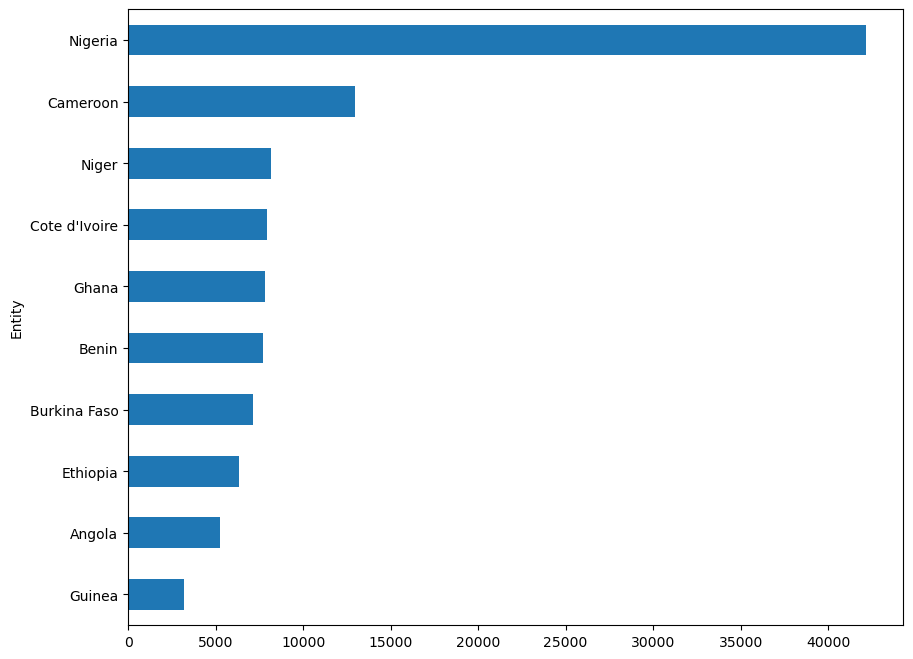

In [163]:
pivot_table['increase']=pivot_table[2019]-pivot_table[1990]
#pivot_table['increase']
#pivot_table['increase'].sort_values(ascending=True).tail(10)
pivot_table['increase'].sort_values(ascending=True).tail(10).plot.barh(figsize=(10,8))

nigeria leads in death

visualizing Nigeria from 1990 to 2019

<AxesSubplot:xlabel='Year'>

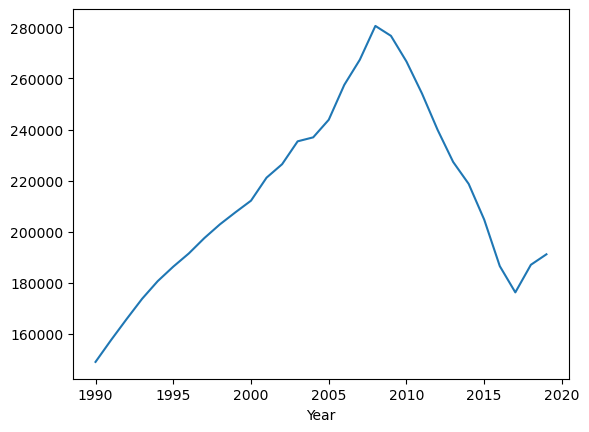

In [164]:
pivot_table.loc['Nigeria', 1990:2019].plot()

top 10 countries which have decreased in malaria death from 1990 to 2019

<AxesSubplot:ylabel='Entity'>

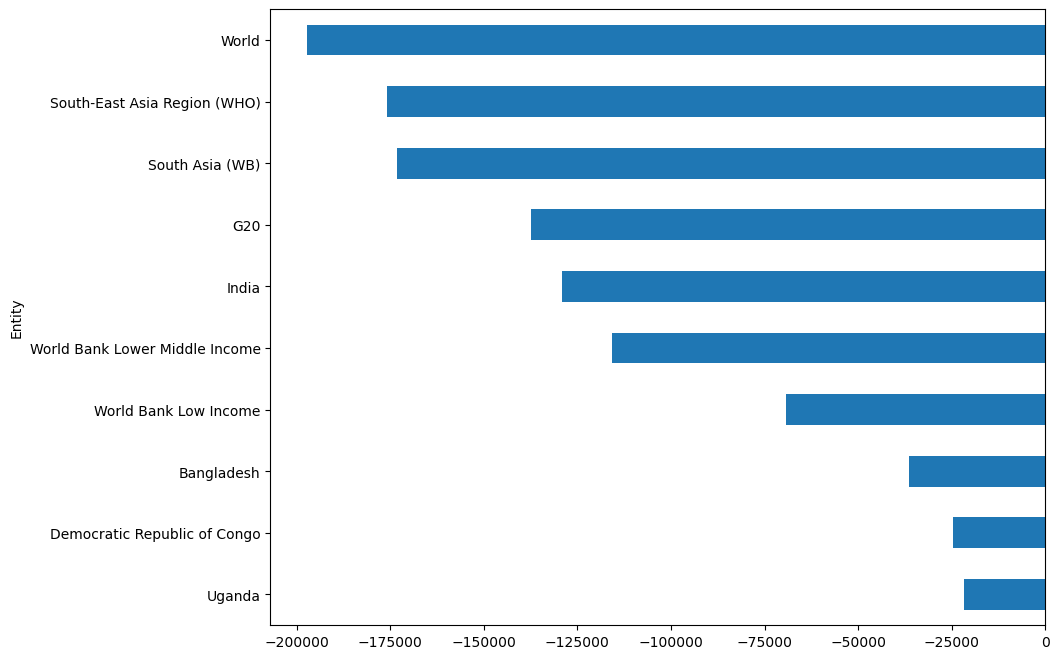

In [165]:
pivot_table['decrease']=pivot_table[2019]-pivot_table[1990]
#pivot_table['decrease']
#pivot_table['decrease'].sort_values(ascending=False).tail(10)
pivot_table['decrease'].sort_values(ascending=False).tail(10).plot.barh(figsize=(10,8))